In [24]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu
train_data = pd.read_csv(r'C:\KHDL_CK\Clean\Dat_new\train_data.csv')
test_data = pd.read_csv(r'C:\KHDL_CK\Clean\Dat_new\test_data.csv')

# features = ['name',	'Year of production','Location', 'Reference number', 'Case area(mm2)','Case material_Gold/Steel','Case material_Platinum','Case material_Red gold','Case material_Rose gold','Case material_Silver','Case material_Steel','Case material_White gold','Case material_Yellow gold','Movement_Automatic','Movement_Manual winding','Movement_Quartz', 'Condition_Fair',	'Condition_Good',	'Condition_Incomplete',	'Condition_New',	'Condition_Unworn',	'Condition_Very good',	'Scope of delivery_No original box, no original papers',	'Scope of delivery_Original box, no original papers',	'Scope of delivery_Original box, original papers',	'Scope of delivery_Original papers, no original box']

In [25]:
train_data = train_data[['price($)', 'name', 'Movement', 'Scope of delivery', 'Location', 'Condition', 'Year of production', 'Case material', 'Reference number', 'Case area(mm2)']]
test_data = test_data[['price($)', 'name', 'Movement', 'Scope of delivery', 'Location', 'Condition', 'Year of production', 'Case material', 'Reference number', 'Case area(mm2)']]

# Tách dữ liệu thành X và y
X_train = train_data[['name', 'Movement', 'Scope of delivery', 'Location', 'Condition', 'Year of production', 'Case material', 'Reference number', 'Case area(mm2)']]
y_train = train_data['price($)']
X_test = test_data[['name', 'Movement', 'Scope of delivery', 'Location', 'Condition', 'Year of production', 'Case material', 'Reference number', 'Case area(mm2)']]
y_test = test_data['price($)']

In [26]:
# Thiết lập mô hình XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Thiết lập lưới tham số
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7]
}

# Sử dụng GridSearchCV để tìm tham số tốt nhất với k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf, verbose=1)

# Huấn luyện mô hình
grid_search.fit(X_train, y_train)

# Lấy tham số tốt nhất
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Huấn luyện mô hình với tham số tốt nhất trên toàn bộ dữ liệu huấn luyện
best_xgb_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror')
best_xgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = best_xgb_model.predict(X_test)

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Tính toán độ chính xác bằng R-squared
r2 = r2_score(y_test, y_pred)
accuracy = r2
print(f'R2_Score: {accuracy:.15f}')

# In ra kết quả độ chính xác của 10 dòng đầu trong file test
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(20))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
RMSE: 15081.974089679094
R2_Score: 0.863215011445946
      Actual      Predicted
0    64563.0   65873.820312
1    14560.0   20936.228516
2   168000.0  109001.718750
3    36700.0   42342.890625
4    68500.0   53170.214844
5    27728.0   24650.470703
6    15022.0   13375.815430
7    35000.0   48829.222656
8    70828.0   63882.937500
9    97500.0  109228.648438
10   25700.0   26718.582031
11    9100.0   11993.222656
12  110783.0  117015.476562
13   72000.0   82230.320312
14   29250.0   28942.222656
15   88000.0   59234.437500
16    6995.0   41383.421875
17   32850.0   35211.214844
18   69687.0   81326.101562
19   11674.0   13677.391602


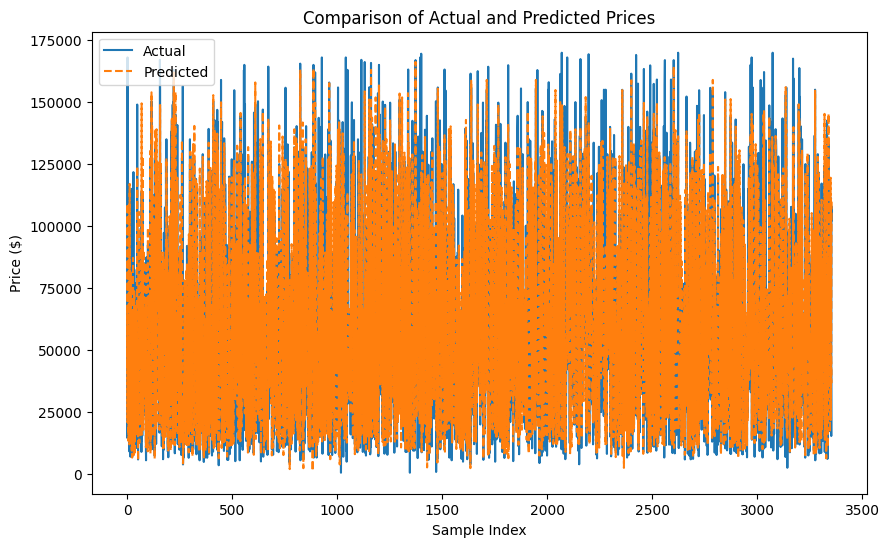

In [27]:
# Vẽ biểu đồ so sánh độ chính xác của mẫu dự đoán và mẫu thực tế
plt.figure(figsize=(10, 6))
plt.plot(results['Actual'].values, label='Actual')
plt.plot(results['Predicted'].values, label='Predicted', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.title('Comparison of Actual and Predicted Prices')
plt.show()

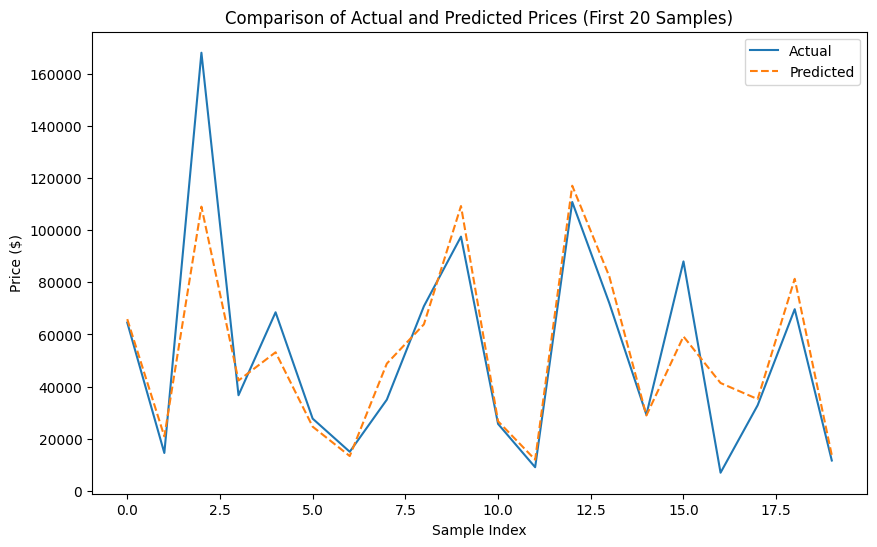

In [28]:
# Lấy 10 mẫu đầu tiên
results_10 = results.head(20)

# Vẽ biểu đồ so sánh độ chính xác của mẫu dự đoán và mẫu thực tế
plt.figure(figsize=(10, 6))
plt.plot(results_10['Actual'].values, label='Actual')
plt.plot(results_10['Predicted'].values, label='Predicted', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.title('Comparison of Actual and Predicted Prices (First 20 Samples)')
plt.show()